<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Open-datasets" data-toc-modified-id="Open-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Open datasets</a></span></li><li><span><a href="#Setting-a-matplotlib-style" data-toc-modified-id="Setting-a-matplotlib-style-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setting a matplotlib style</a></span></li><li><span><a href="#Loading-data-from-a-database" data-toc-modified-id="Loading-data-from-a-database-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading data from a database</a></span></li><li><span><a href="#Label-from-a-column-to-column-names" data-toc-modified-id="Label-from-a-column-to-column-names-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Label from a column to column names</a></span></li><li><span><a href="#Scatterplot-to-compare-true-and-predicted-values" data-toc-modified-id="Scatterplot-to-compare-true-and-predicted-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scatterplot to compare true and predicted values</a></span></li><li><span><a href="#Boxplot-to-compare-2-ranges" data-toc-modified-id="Boxplot-to-compare-2-ranges-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Boxplot to compare 2 ranges</a></span></li><li><span><a href="#Histogram-with-appropriate-xticks" data-toc-modified-id="Histogram-with-appropriate-xticks-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Histogram with appropriate xticks</a></span></li><li><span><a href="#Piecharts" data-toc-modified-id="Piecharts-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Piecharts</a></span></li><li><span><a href="#Waffle-chart-function" data-toc-modified-id="Waffle-chart-function-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Waffle chart function</a></span></li><li><span><a href="#Train-/-test-split" data-toc-modified-id="Train-/-test-split-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Train / test split</a></span><ul class="toc-item"><li><span><a href="#Split-without-sklearn" data-toc-modified-id="Split-without-sklearn-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Split without sklearn</a></span></li></ul></li><li><span><a href="#False-positive-rate" data-toc-modified-id="False-positive-rate-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>False positive rate</a></span></li><li><span><a href="#Gradient-descent" data-toc-modified-id="Gradient-descent-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Gradient descent</a></span></li><li><span><a href="#Make-interactions-for-linear-regression" data-toc-modified-id="Make-interactions-for-linear-regression-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Make interactions for linear regression</a></span></li><li><span><a href="#Visualize-different-regularization-coefficients" data-toc-modified-id="Visualize-different-regularization-coefficients-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Visualize different regularization coefficients</a></span></li><li><span><a href="#Saving-and-loading-models" data-toc-modified-id="Saving-and-loading-models-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Saving and loading models</a></span></li><li><span><a href="#Regression-with-summary" data-toc-modified-id="Regression-with-summary-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Regression with summary</a></span></li><li><span><a href="#Plotting-subplots-in-a-loop" data-toc-modified-id="Plotting-subplots-in-a-loop-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Plotting subplots in a loop</a></span></li><li><span><a href="#Making-tables-without-html" data-toc-modified-id="Making-tables-without-html-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Making tables without html</a></span></li></ul></div>

# My code to reuse

In [4]:
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Open datasets
* https://developer.ibm.com/exchanges/data/
* https://www.kaggle.com/datasets

## Setting a matplotlib style

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [3]:
plt.style.use('ggplot')

## Loading data from a database

In [7]:
sql_query = """
SELECT 
  p.*, 
  mp.* 
FROM 
  database.mech_properties mp, 
  database.piece_info p 
WHERE 
  mp."ID MES" = p."ID MES" -- ID MES is used to join data
  AND p."date_of_production" BETWEEN to_date('01.12.2021 00:00:00', 'DD.MM.YYYY HH24:mi:ss') 
  AND to_date('31.12.2021 23:59:59', 'DD.MM.YYYY HH24:mi:ss')
"""         

```python
    # %%time

    dsn_tns = cx_Oracle.makedsn('xxxxxx.com', '1521',
                                service_name='yyyyyyyyyyyyy.com')
    conn = cx_Oracle.connect(dsn=dsn_tns)
    cursor = conn.cursor() 
    df = pd.DataFrame(cursor.execute(sql_query_all).fetchall())

    # Making column names
    table_columns = [column[0] for column in cursor.description]
    df.columns = table_columns

    conn.close()
```

## Label from a column to column names


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html
- https://stackoverflow.com/questions/43788097/pandas-take-a-label-from-a-row-of-a-data-frame-and-convert-it-to-a-column-name

```python
    # aggfunc='first' / 'mean' / max
    df_processed = df.pivot_table(values='Column_with_values',
                                  index=selected_columns,
                                  columns=['Column_with_labels'],
                                  aggfunc='first',
                                  fill_value=None,
                                  dropna=True).reset_index()
    df_processed
```

## Scatterplot to compare true and predicted values

In [6]:
def true_vs_predicted_plot(y_true, y_predicted, title, true_label, predicted_label):
    """
    Функция для построения графика сравнения расчитанного значения с фактическим.
    x=y_predicted,
    y=y_true
    """

    min_val = min([min(y_true), min(y_predicted)])
    max_val = max([max(y_true), max(y_predicted)])
    range_val = max_val - min_val
    r_2 = r2_score(y_true, y_predicted)

    plt.figure(figsize=(6, 6))
    plt.scatter(x=y_predicted,
                y=y_true)
    plt.plot([min_val, max_val], [min_val, max_val], linestyle=':')
    plt.xlabel(predicted_label)
    plt.ylabel(true_label)
    plt.title(title)
    plt.grid(linestyle=':')
    plt.text(x=min_val + range_val * 0.25,
             y=min_val + range_val * 0.75,
             s=f'$R^2$ ={round(r_2, 2)}')
    plt.show()

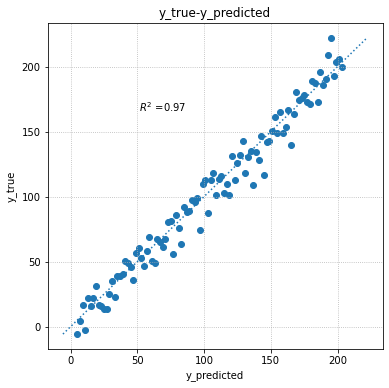

In [7]:
# example
x = np.arange(0, 100, 1)
noise = np.random.randn(100)*10
y_true = x*2 + 5 + noise
y_predicted = x*2 + 5

true_vs_predicted_plot(y_true=y_true, y_predicted=y_predicted,
                       title='y_true-y_predicted',
                       true_label='y_true',
                       predicted_label='y_predicted')

## Boxplot to compare 2 ranges

In [6]:
def boxplot_for_comparison(parameter_1, parameter_2, labels, title):
    """
    Функция для совместного изображения ящиков с усами
    для содержаний каждого химческого элемента
    - в выборке, использованной для построения модели "ТИХ 2.0";
    - в выборке слябров с трещинами, причиннами которых может быть склонность стали к ТИХ.
    
    * parameter_1 - список значений величины 1;
    * parameter_2 - список значений величины 2;
    * labels - список названий для каждого ящика ['parameter_1', 'parameter_2'];
    * title - Название графика.
    
    """

    plt.boxplot((parameter_1, parameter_2),
                labels=labels)
    plt.title(title)
    plt.show()
    

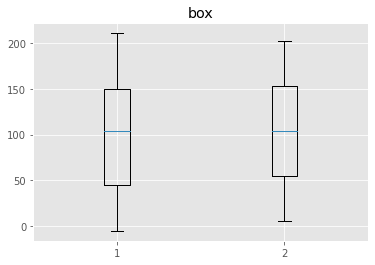

In [7]:
# Example
boxplot_for_comparison(parameter_1=y_true,
                       parameter_2=y_predicted,
                       labels=['1', '2'],
                       title='box')

## Histogram with appropriate xticks

In [8]:
x = np.random.randn(10000)

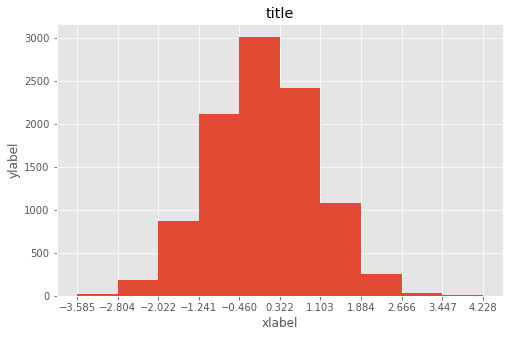

In [9]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(x)  # this will make nice bin intervals, that we will use later

plt.figure(figsize=(8, 5))
plt.hist(x)
plt.title('title') # add a title to the histogram
plt.ylabel('ylabel') # add y-label
plt.xlabel('xlabel') # add x-label
plt.xticks(bin_edges)

plt.show()

## Piecharts

Download the Canadian Immigration dataset and read it into a pandas dataframe.

In [13]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [14]:
# Clean up the dataset to remove columns that are not informative
# for visualization (eg. Type, AREA, REG).
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# renaming the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, will make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [18]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


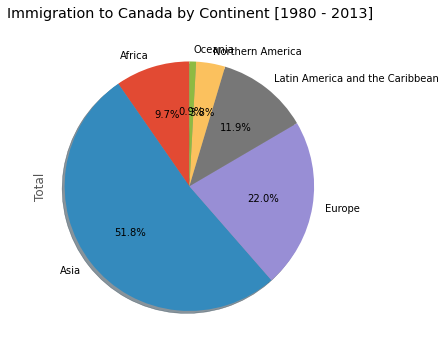

In [16]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

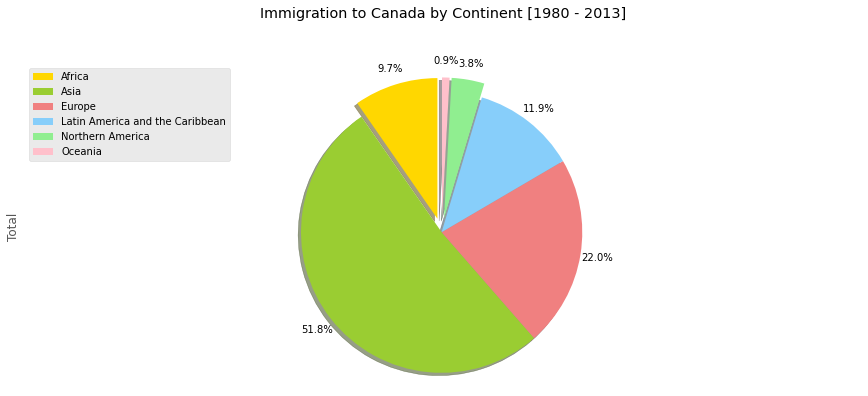

In [17]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

## Waffle chart function

https://towardsdatascience.com/waffle-charts-using-pythons-matplotlib-94252689a701

There is a library as well: https://pywaffle.readthedocs.io/en/latest/

In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    
    """
    categories: Unique categories or classes in dataframe.
    values: Values corresponding to categories or classes.
    height: Defined height of waffle chart.
    width: Defined width of waffle chart.
    colormap: Colormap class
    value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.
    
    """

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

## Train / test split

### Split without sklearn

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

## False positive rate 

In [ ]:
def false_positive_rate(y_true, y_pred):
    """
    Функция, которая расчитывает false posotive rate - долю ложноположтельных среди всех реально отрицательных:
    FPR = FP / N  или FPR = FP / (FP + TN)
    - tp (true positive) реально положительных прогнозов;
    - tn (true negative) реально отрицательных прогнозов;
    - fp (false positive) ложноположительных прогнозов;
    - fn (false negative) ложноотрицательных прогнозов;
    """
    tn, fp = 0, 0
    for true, pred in zip(y_true, y_pred):
        if (pred == 1) & (true != pred):
                fp += 1
        if (pred == 0) & (true == pred):
                tn += 1
    return fp / (fp + tn)

In [ ]:
def tp_tn_fp_fn(y_true, y_pred):
    """
    Функция, которая расчитывает количество 
    - tp (true positive) реально положительных прогнозов;
    - tn (true negative) реально отрицательных прогнозов;
    - fp (false positive) ложноположительных прогнозов;
    - fn (false negative) ложноотрицательных прогнозов;
    """
    tp, tn, fp, fn = 0, 0, 0, 0
    for true, pred in zip(y_true, y_pred):
        if pred == 1:
            if true == pred:
                tp += 1
            else:
                fp += 1
        if pred == 0:
            if true == pred:
                tn += 1
            else:
                fn += 1       
    return tp, tn, fp, fn
        

## Gradient descent

In [ ]:
def gradient_descent(X, y, coeffs, learning_rate=1e-06, tolerance=1e-04, n_iter=500,
                     verbose=False, return_mse_history=False):
    
    """
    * X - матрица значений признаков (n, k), где n - количество наблюдений, k - количство признаков
    * y - значения предсказываемой переменной, вектор длиной n
    * coeffs - первое приближение в коэффициентов линейной модели в виде вектора: (intercept, a1, ...ak)
    * learning_rate - шаг градиентного спуска
    * tolerance - допустимая ошибка
    * n_iter - количество итераций

    """
    
    # Преобразование в np.array
    coeffs = np.array(coeffs)

    # Количество наблюдений
    n = len(y)

    # Добавление к матрице X столбца с единицами, чтобы возможно было вычислить intercept
    X_with_ones = np.stack(((np.ones(n)), X))

    # Массив для храненя значений среднеквадратичной ощибки на каждой итерации
    mse_history = []

    for iteration in range(n_iter):
        # Вычисление вектора предсказанных значений
        y_pred = np.dot(X_with_ones.T, coeffs)

        # вычсиляем среднеквадратичную ошибку и записываем в массив 
        mse = mean_squared_error(y, y_pred)
        mse_history.append(mse)

        # Вычисление вектора градиента
        gradient = np.dot(X_with_ones, 2/n*(y_pred - y))     

        # Обновление коэффициентов с учетом градиента
        step = learning_rate * gradient
        coeffs = coeffs - step

        # Если шаги движения по градиенту по всем измерениям малы, то остатанавливаем алгоритм
        if np.all(np.abs(step) <= tolerance):
            break      

        # Если нужно выводить данные с каждого шага
        if verbose == True:
            print(iteration, gradient, mse, coeffs)
    if return_mse_history == True:    
        return coeffs, mse, mse_history
    else:
        return coeffs, mse


In [ ]:
def gradient_descent_multiple_run(X, y, init_guess_range=500,
                                  learning_rate=1e-06, tolerance=1e-04, n_iter=500,
                                  n_attempts=1000):
    
    """
    Функция, которая ищет коэффициента линейной регрессии с помощью многократного
    запуска градиентного спуска. Многократный запуск необходим для того чтобы 
    уменьшить влияние начальной точки.
    
    * X - матрица значений признаков (n, k), где n - количество наблюдений, k - количство признаков
    * y - значения предсказываемой переменной, вектор длиной n
    * init_guess_range - правая граница диапазона [0...init_guess_range],
      из которого выбирать первое приближение для коэффициентов  
    * learning_rate - множитель, определяющий шаг градиентного спуска
    * tolerance - допустимая ошибка
    * n_iter - максимальное количество итераций для одного запуска градиентного спуска 
    * n_attempts - количество запусков градиентного спуска

    """
    # Количество наблюдений величины y
    n = len(y)
    
    # Добавление к матрице X столбца с единицами, чтобы возможно было вычислить intercept
    X_with_ones = np.stack(((np.ones(n)), X))
    
    # Массивы для записи результатов расчётов каждго запуска алгоритма
    coeffs_all_attempts = []
    mse_all_attempts = []

    # Цикл по попыткам запуска алгоритма градиентного спуска
    # Нужен для того, чтобы из всех найденных локальных минимумов MSE выбрать наименьший
    for attempt in range(n_attempts):

        # Задание первого приближения для коэффициентов
        inintial_coeffs = (np.random.choice(range(init_guess_range)), np.random.choice(range(init_guess_range)))
               
        # Преобразование в np.array
        coeffs = np.array(inintial_coeffs)      
        
        # Цикл по итерациям градиентного спуска внутри одного запуска алгоритма градиентного спуска
        for iteration in range(n_iter):
            # Вычисление вектора предсказанных значений y
            y_pred = np.dot(X_with_ones.T, coeffs)

            # вычсиляем среднеквадратичную ошибку и записываем в массив 
            mse = mean_squared_error(y, y_pred)
            mse_history.append(mse)

            # Вычисление вектора градиента
            gradient = np.dot(X_with_ones, 2/n*(y_pred - y))     

            # Обновление коэффициентов с учетом градиента
            step = learning_rate * gradient
            coeffs = coeffs - step

            # Если шаги движения по градиенту по всем измерениям малы, то остатанавливаем алгоритм
            if np.all(np.abs(step) <= tolerance):
                break      
     
        coeffs_all_attempts.append(coeffs)
        mse_all_attempts.append(mse)
        
        # Выбор наименьшего значения MSE из всех локальных минимумов
        ind = mse_all_attempts.index(min(mse_all_attempts))
        best_coeffs = coeffs_all_attempts[ind]
        
    return best_coeffs

## Make interactions for linear regression

In [ ]:
def make_df_with_interactions(df):
    """
    Функция, которая создаёт новый датафрейм с эффектами взимодействия.
    * df - датафрейм, который содержит только независимые параметры.
    """
    # создаём новую таблицу с факторами
    X = df.copy()
    
    # добавляем в таблицу с факторами столбцы с парными взаимодействиями
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            if j>i:
                X[f'{df.columns[i]}*{df.columns[j]}'] = df[df.columns[i]] * df[df.columns[j]]                                
                
    return X

In [ ]:
def make_df_with_interactions_no_corr(df, threshold):
    """
    Функция, которая создаёт новый датафрейм с эффектами взимодействия.
    При этом учитываются коррелляции создаваемых эффектов взаимодействия
    с исходными параметрами: если коррелляция меньше заданного порога,
    то новая переменная создаётся.
    
    * df - датафрейм, который содержит только независимые параметры.
    * threshold - пороговое значение коэффициента корреляции
    """
    # создаём новую таблицу с факторами
    X = df.copy()
    
    # добавляем в таблицу с факторами столбцы с парными взаимодействиями
    for i in range(len(df.columns)):
        for j in range(len(df.columns)):
            if j>i:
                tmp_column = df[df.columns[i]] * df[df.columns[j]]                
                condition_1 = abs(pearsonr(tmp_column, df[df.columns[i]])[0]) < threshold
                condition_2 = abs(pearsonr(tmp_column, df[df.columns[j]])[0]) < threshold
                if condition_1 & condition_2:
                    X[f'{df.columns[i]}*{df.columns[j]}'] = tmp_column                    
                
    return X

## Visualize different regularization coefficients

In [2]:
# Попробуем различные значения степени регуляризации
# alpha_range = [0.1, 1, 5, 10, 30, 50, 80, 100, 150, 200, 300, 500, 1000]
alpha_range = [0, 0.1] + list(range(1, 400, 10))
r2_scores = []  # сюда будем складывать значения R2
for alpha in alpha_range:
    reg = Lasso(alpha=alpha, fit_intercept=True)
    reg.fit(X=X, y=y)
    r2_tmp = r2_score(y_true=y, y_pred=reg.predict(X))
    r2_scores.append(r2_tmp)
    
plt.scatter(x=alpha_range,
            y=r2_scores)
plt.title('Зависимость R2 от степени регуляризации')
plt.xlabel('Степень регуляризации')
plt.ylabel('R2')
plt.grid(ls=':')
plt.show()

## Saving and loading models 

https://stackoverflow.com/questions/56107259/how-to-save-a-trained-model-by-scikit-learn

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [55]:
# generating data
X, y, coef = make_regression(n_samples=100, n_features=2, n_informative=2, noise=0.2, coef=True)
coef

array([24.40277289,  8.07889955])

In [56]:
# training model
reg = LinearRegression(fit_intercept=False)
reg.fit(X=X, y=y)
reg.coef_

array([24.39804272,  8.0890401 ])

In [57]:
import pickle

In [58]:
# Saving model
with open('C:\mx\model.pkl','wb') as f:
    pickle.dump(reg, f)

# Loading model моделей

with open('C:\mx\model.pkl', 'rb') as f:
    reg_loaded = pickle.load(f)


## Regression with summary

In [ ]:
import statsmodels.api as sm

In [ ]:
#define response variable
y = df[y_column]

#define predictor variables
x = df[X_columns]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

## Plotting subplots in a loop

In [ ]:
def make_scatterplots(df, x_columns, y_column):
    """
    Функция для построения нескольких диаграмм рассеяния в виде сетки.
    Каждая диаграмма рассеяния показывает свяь переменной y_column с переменными из списка x_columns.
    Сетка имеет 3 столбца. Количество строк в сетке изменяется в зависимости от необходимого количества графиков. 
        
    Входные параметры:
    * df - таблица с данными;
    * x_columns - список названий "влияющих" переменных;
    * y_column - название "зависимой" переменной  
        
    """
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle(f'Связь {y_column} с другими переменными', fontsize=18, y=0.95)

    # количество столбцов в сетке для построения графиков
    ncols = 3

    # Расчёт количества строк в сетке
    nrows = len(x_columns) // ncols + (len(x_columns) % ncols > 0)

    # Цикл по названиям столбцов
    for n, x_col in enumerate(x_columns):
        # добавление очередного subplot
        ax = plt.subplot(nrows, ncols, n + 1)

        # построение диаграммы рассеяния
        ax.scatter(df[x_col], df[y_column])

        # подписи по осям
        ax.set_ylabel(y_column)
        ax.set_xlabel(x_col)

## Making tables without html

| Date (YYYY-MM-DD) | Version | Changed By | Change Description  |
| ----------------- | ------- | ---------- | --------------------|
| 2022-05-26        | 1.2     | Maks       | Updated this        |
| 2022-05-15        | 1.1     | Maks       | Updated that        |
| 2022-05-01        | 1.0     | Maks       | Updated this        |
